# Climate Change Belief Analysis
  ## TEAM 2 JULY2021

# Introduction
Climate change is a critical phenomena facing humankind. Extreme temparatures and effects of global warming has caused a shift on how climate change is viewed. Recognizing how serious the issue is, companies are working tiredlessly to create products and services that leave little to zero carbon footprint. However, even with scientific evidence around Climate Change, public opinion still varies on the subject.

In this challenge, the goal is to build a Classification model that will determine whether a person believes in Climate Change using twitter data. Not only will the model provide insight on public opinion, it will also help companies determine how to position and improve their products and services.

The overall objective idea of this challenge is to create a model that will not only work on climate change sentiments but also all other sentiments classification in all sectors, public or private.

# Overview
Predict an individual's belief in climate change based on historical tweet data.

## Challenge Approach
In solving this problem, we employ natural language processing (NLP) and machine learning. 

1. Import all required libraries.

2. Import data and perform exploratory data analysis(EDA). 

3. Pre-processing to prepare the data for machine learning 

4. Model development 

5. Model performance comparison. 

# Import Packages

In [31]:
import pandas as pd
import numpy as np
import string
from numpy import percentile
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import nltk
import re 
from sklearn.utils import resample #used for downsampling
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Thandazani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thandazani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [33]:
train = pd.read_csv("C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning/Machine Learning Project 2/Advanced_Classification_Predict-student_data-2780/train.csv")
test =pd.read_csv("C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning\Machine Learning Project 2/Advanced_Classification_Predict-student_data-2780/test_with_no_labels.csv")

In [34]:
df = train.copy()
dft = test.copy()

In [35]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [36]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Make lower case
print ('Lowering case...')
df['message'] = df['message'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
df['message'] = df['message'].apply(remove_punctuation_numbers)

Removing URLs...
Lowering case...
Cleaning punctuation...


In [37]:
## Remove urls
print ('Removing URLs...')
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
dft['message'] = dft['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Make lower case
print ('Lowering case...')
dft['message'] = dft['message'].str.lower()

# Remove punctuation
import string
print ('Cleaning punctuation...')
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
dft['message'] = dft['message'].apply(remove_punctuation_numbers)

Removing URLs...
Lowering case...
Cleaning punctuation...


In [38]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired was a pivotal year in the...,573736
4,1,rt soynoviodetodas its and a racist sexist cl...,466954


In [39]:
X = df['message']
y = df['sentiment']

In [40]:
vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [42]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [43]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()
]

In [44]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average = 'macro')
    recall    = metrics.recall_score(y_train, y_pred, average = 'macro')

    f1        = metrics.f1_score(y_train, y_pred, average = 'macro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average = 'macro')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

print ('... All done!')

Fitting Logistic Regression model...


C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...


C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklea

... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklea

... predicting
... scoring
... All done!


In [48]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.995101,0.996016,0.993748,0.994878,0.508577,76.727397
Logistic Regression,0.861636,0.911612,0.741686,0.796475,0.605934,2.521138
Nearest Neighbors,0.809087,0.744230,0.778880,0.758393,0.544529,0.002559
AdaBoost,0.642434,0.624277,0.494238,0.525129,0.502111,7.878529
Decision Tree,0.611695,0.701044,0.377049,0.392331,0.381669,0.312764
Random Forest,0.538127,0.134532,0.250000,0.174929,0.176085,0.031783
Linear SVM,0.538048,0.134523,0.249963,0.174913,0.176813,38.664035


In [49]:
X_NB_test = dft['message']
X_test =vector.transform(X_NB_test)

In [50]:
test_pred = clf.predict(X_test)

In [51]:
test['sentiment'] = test_pred

subm = test[['tweetid','sentiment']]
subm.to_csv('sub.csv', index=False)

In [52]:
subm

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,0
10542,875167,1
10543,78329,1
10544,867455,1


<AxesSubplot:xlabel='Classifier'>

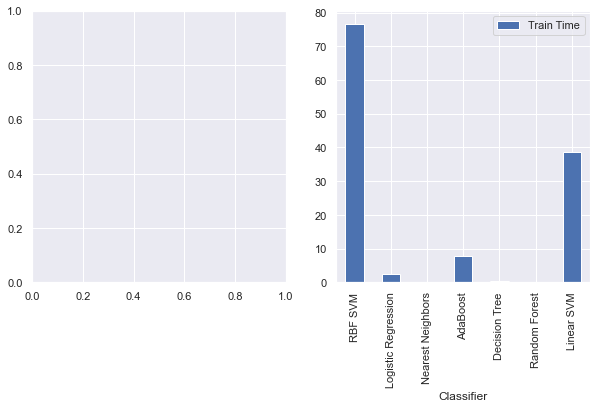

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
#results.plot(y=['F1 Test'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.85,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

In [29]:
print(class_report['RBF SVM'])

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      1045
           0       1.00      0.99      0.99      1878
           1       0.99      1.00      1.00      6818
           2       0.99      0.99      0.99      2914

    accuracy                           0.99     12655
   macro avg       1.00      0.99      0.99     12655
weighted avg       0.99      0.99      0.99     12655



In [30]:
model = models['Logistic Regression']
print(cross_val_score(model, X.toarray(), y))

C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thandazani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[0.73735777 0.74209861 0.73957016 0.74683944 0.74612709]


In [ ]:
#Appplying Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_prediction = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,lr_prediction)

print("Training accuracy Score    : ",lr.score(X_train,y_train))
print("Testing accuracy Score : ",lr_accuracy )
print(classification_report(lr_prediction,y_test))

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [ ]:
lm_full = LogisticRegression()

In [ ]:
# No transformations necessary
lm_full.fit(X1_train, y1_train)

In [ ]:
# Generate predictions from full model
pred_lm_full = lm_full.predict(X1_test)

lm_full_accuracy = accuracy_score(y1_test,pred_lm_full)

print("Training accuracy Score    : ",lm_full.score(X1_train,y1_train))
print("Testing accuracy Score : ",lm_full_accuracy )
print(classification_report(pred_lm_full,y1_test))

In [ ]:
X_NB_test = dft['message']
X_test =vector.transform(X_NB_test)

In [ ]:
test_pred = lr.predict(X_test)

test['sentiment'] = test_pred

subm = test[['tweetid','sentiment']]
subm.to_csv('sub.csv', index=False)

In [ ]:
subm

In [ ]:
y3 = df['lang_id']
y3 = y3.iloc[:5682]
test2 = dftest['text']
test2 = test2.iloc[:5682]
X3 = test2
X1_test =vector.transform(X3)

test_pred = lm_full.predict(X1_test)

y3 = test_pred
test['lang_id'] = test_pred

submit = test[['index','lang_id']]
submit.to_csv('Desktop/submitlogisticReg3.csv', index=False) 